In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

for root, dirs, files in os.walk("."):
    level = root.replace(os.path.sep, "/").count('/')
    indent = " " * 4 * level
    print(f"{indent}📁 {os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files:
        print(f"{subindent}📄 {f}")


📁 ./
    📄 Data_Filtering_tvs_projectors.ipynb
    📄 DATA_VISUALIZATION_JIO_PROJECTORS.ipynb
    📄 Data_viz_jio_tvs.ipynb


In [3]:
df1 =  pd.read_csv("jiomart_projectors_combined.csv")
df1



,Name of the Product,Brand Name,Selling Price (INR),Original Price (INR),Resolution,Discount (%),Bank Offer,Limited Time Deal
0,Hespa Mini Projector LED Home Theater with Rem...,Hespa,1299,2999,HD READY,56,No Bank Offer,No Limited Time Deal
1,Hespa Mini Projector LED Home Theater with Rem...,Hespa,1299,2999,HD READY,56,No Bank Offer,No Limited Time Deal
2,Hespa Portable Mini Projector LED Home Theater...,Hespa,1299,2999,HD READY,56,No Bank Offer,No Limited Time Deal
3,Hespa YG-300 HD Smart Mini Movie Projector LED...,Hespa,1299,2999,HD READY,56,No Bank Offer,No Limited Time Deal
4,Hespa Full HD Mini Projector LED Home Theater ...,Hespa,1399,2999,FULL HD,53,No Bank Offer,No Limited Time Deal
...,...,...,...,...,...,...,...,...
174,Torexo Sales T10 Full HD 1920*1080P Android Pr...,Torexo,12299,21999,FULL HD,44,No Bank Offer,No Limited Time Deal
175,YOTON Andriod 5G WiFi Projector Home 4K Suppor...,YOTON,7599,19999,4K,62,No Bank Offer,No Limited Time Deal
176,"ZuZu, move for more better. 3D Full HD LED Pro...","ZuZu,",14500,29999,FULL HD,51,No Bank Offer,No Limited Time Deal
177,IBS Mini ANDRIOD Projector for Home 4K Support...,IBS,7599,19999,4K,62,No Bank Offer,No Limited Time Deal


In [50]:

no_of_products = df1['Brand Name'].value_counts()
avg_selling_price = df1.groupby('Brand Name')['Selling Price (INR)'].mean().sort_values(ascending=False)
avg_selling_price
results = pd.DataFrame({
    'No of Products': no_of_products,
    'Avg Selling Price (INR)': avg_selling_price
})
results = results.reset_index()
results
results[results['No of Products'] > 2].sort_values('Avg Selling Price (INR)', ascending=False)

,Brand Name,No of Products,Avg Selling Price (INR)
19,SFZ,5,37999.000000
12,Lazervision,3,28826.666667
34,"ZuZu,",15,21669.933333
23,Tonzo,6,10157.333333
20,TONZO,4,9549.250000
32,XElectron,3,7173.333333
14,Omex,8,7071.250000
33,YOTON,5,6060.200000
26,Trigent,5,6060.200000
13,METRONAUT,5,6033.000000


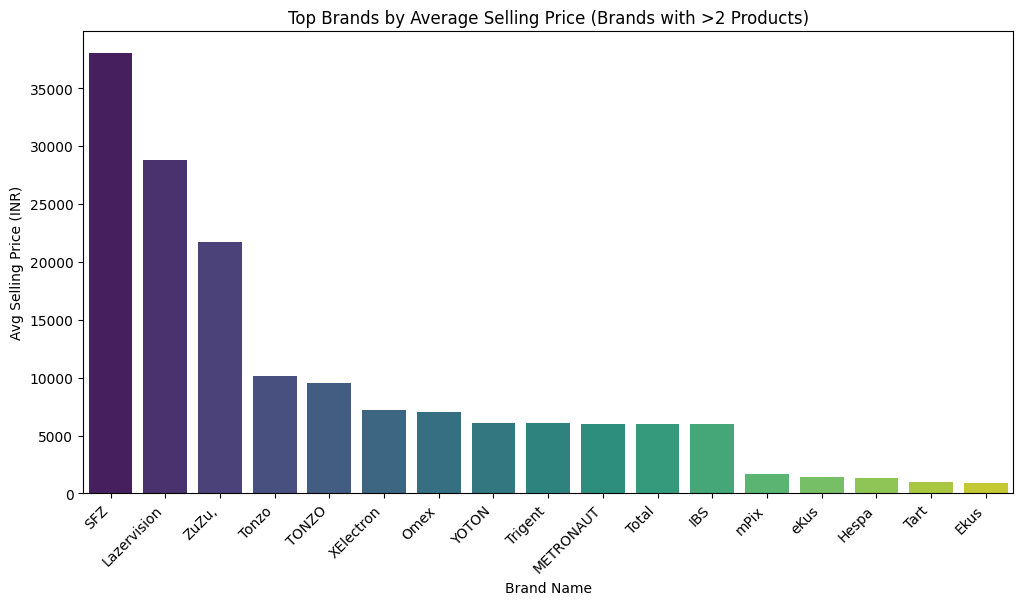

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = results[results['No of Products'] > 2].sort_values('Avg Selling Price (INR)', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    x='Brand Name',
    y='Avg Selling Price (INR)',
    #z='No of Products',  # Optional: Use this if you want to show the number of products in the bar
    data=filtered_df,
    hue='Brand Name',           # Add this line
    palette='viridis',
    legend=False                # Hide the legend if you don't want it
)

plt.title('Top Brands by Average Selling Price (Brands with >2 Products)')
plt.xticks(rotation=45, ha='right')
plt.show()


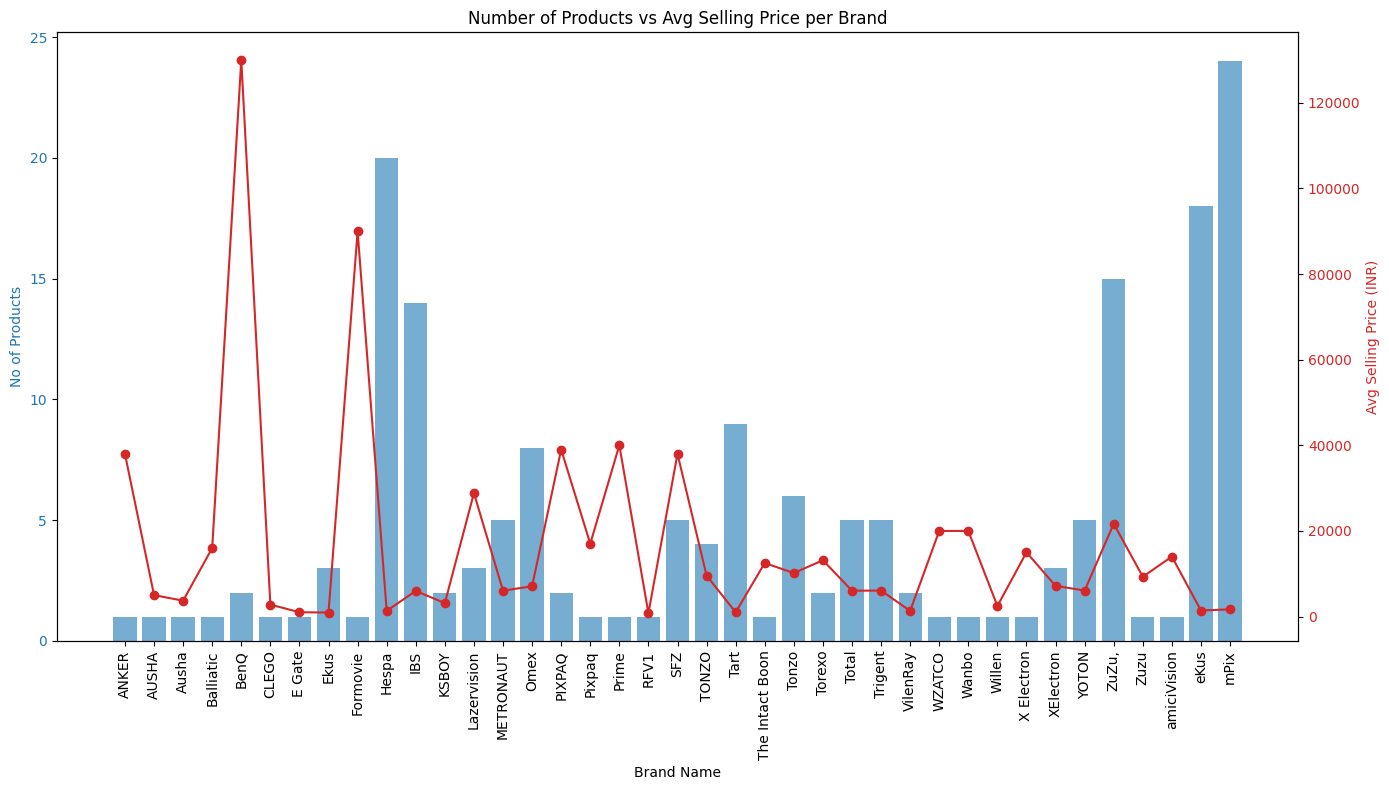

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataframe is called df
# Columns: 'Brand Name', 'No of Products', 'Avg Selling Price (INR)'

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for Number of Products
color = 'tab:blue'
ax1.set_xlabel('Brand Name')
ax1.set_ylabel('No of Products', color=color)
ax1.bar(results['Brand Name'], results['No of Products'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

# Secondary axis for Avg Selling Price
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Avg Selling Price (INR)', color=color)
ax2.plot(results['Brand Name'], results['Avg Selling Price (INR)'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Number of Products vs Avg Selling Price per Brand')
plt.tight_layout()
plt.show()


In [103]:

df1['Resolution'] = df1['Resolution'].replace({'FHD': 'FULL HD'})


In [104]:
df_pivot = df1.groupby('Resolution')['Brand Name'].value_counts().unstack().fillna(0).astype(int)
df_pivot


Brand Name,ANKER,AUSHA,Ausha,Balliatic,BenQ,CLEGO,E Gate,Ekus,Formovie,Hespa,...,Wanbo,Willen,X Electron,XElectron,YOTON,"ZuZu,",Zuzu,amiciVision,eKus,mPix
Resolution,,,,,,,,,,,,,,,,,,,,,
4K,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,3,0,0,0,3
FULL HD,0,1,1,0,0,0,1,0,1,2,...,0,0,1,1,2,8,0,1,2,2
HD READY,1,0,0,1,2,1,0,3,0,18,...,0,1,0,2,1,4,1,0,16,19


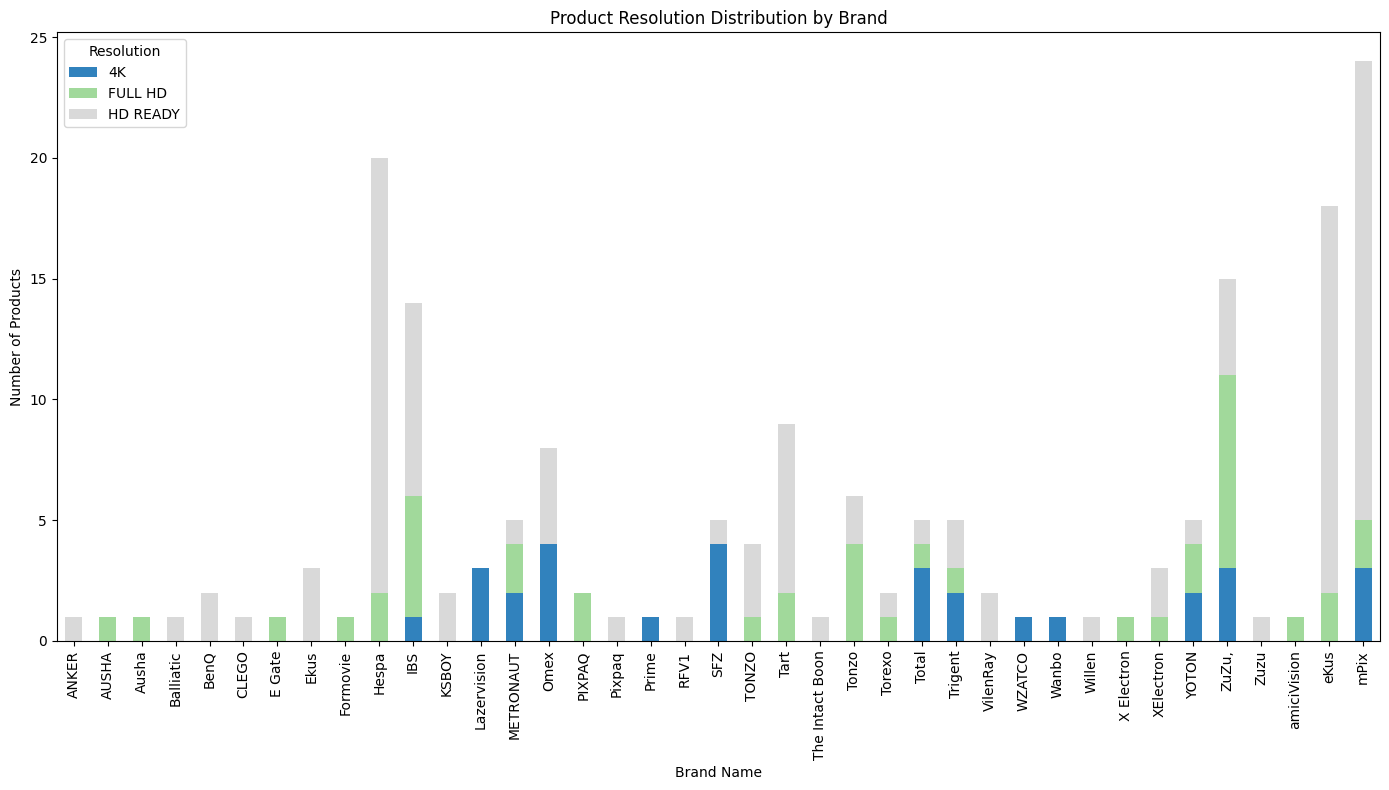

In [105]:
import matplotlib.pyplot as plt

# Assuming your pivot data is in 'df_pivot' where index is Resolution and columns are Brand Names
df_pivot.T.plot(kind='bar', stacked=True, figsize=(14,8), colormap='tab20c')

plt.title('Product Resolution Distribution by Brand')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



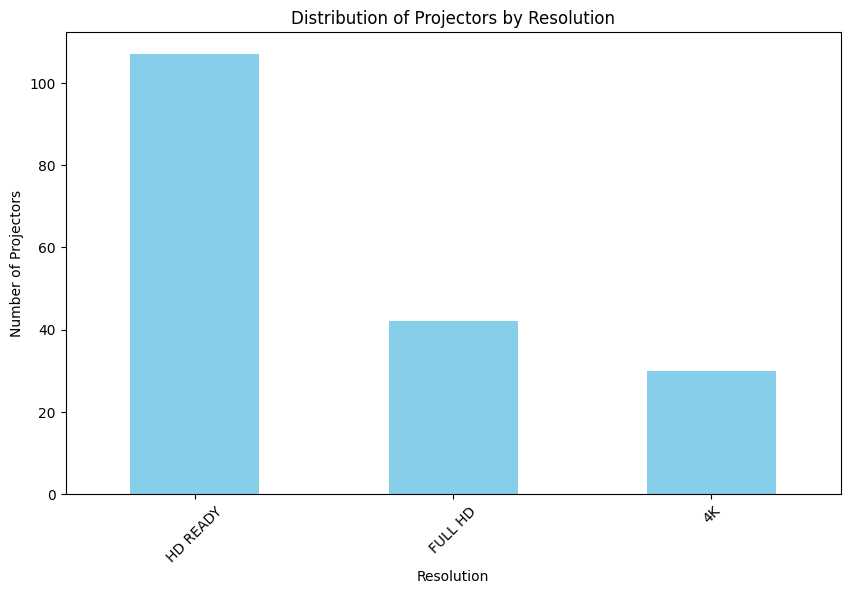

In [106]:
df1["Resolution"].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribution of Projectors by Resolution')
plt.xlabel('Resolution')
plt.ylabel('Number of Projectors')
plt.xticks(rotation=45)
plt.show()

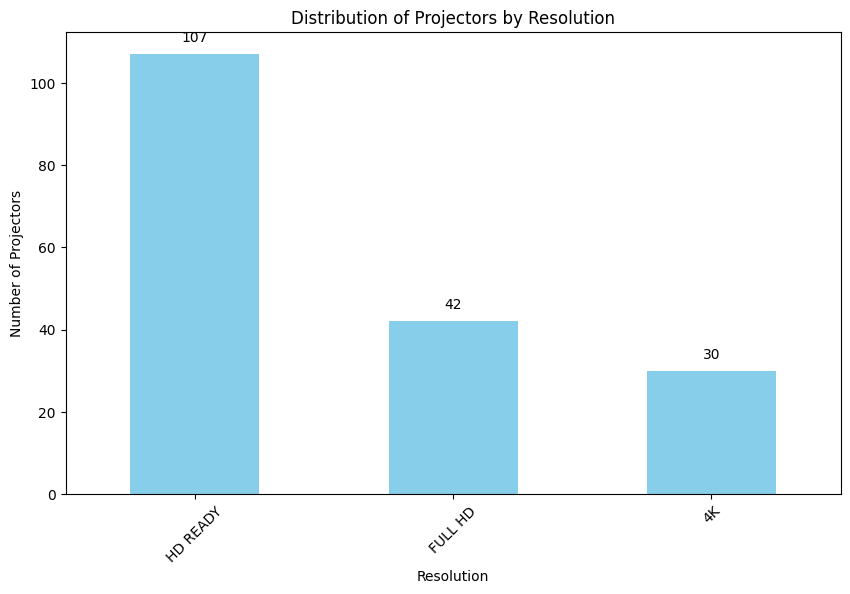

In [107]:
df1["Resolution"].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribution of Projectors by Resolution')
plt.xlabel('Resolution')
plt.ylabel('Number of Projectors')
plt.xticks(rotation=45)

# Add count values on top of each bar
for i, v in enumerate(df1["Resolution"].value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')

plt.show()

In [120]:
df1['Resolution'] = df1['Resolution'].str.upper()  # To standardize categories like 'fhd', 'FHD', 'FULL HD' etc.

# Combine FHD and FULL HD into one category called 'FULL HD'
df1['Resolution'] = df1['Resolution'].replace({'FHD': 'FULL HD'})

# Now calculate average selling price per Resolution category
avg_price_per_resolution = df1[df1['Resolution'].isin(['4K', 'FULL HD', 'HD READY'])].groupby('Resolution')['Selling Price (INR)'].mean().sort_values(ascending=False)

print(avg_price_per_resolution)


Resolution
4K          16540.666667
FULL HD     13289.833333
HD READY     6667.112150
Name: Selling Price (INR), dtype: float64


In [123]:
avg_price_per_resolution = df1.groupby('Resolution')['Selling Price (INR)'].mean()
count_per_resolution = df1['Resolution'].value_counts().reindex(avg_price_per_resolution.index)

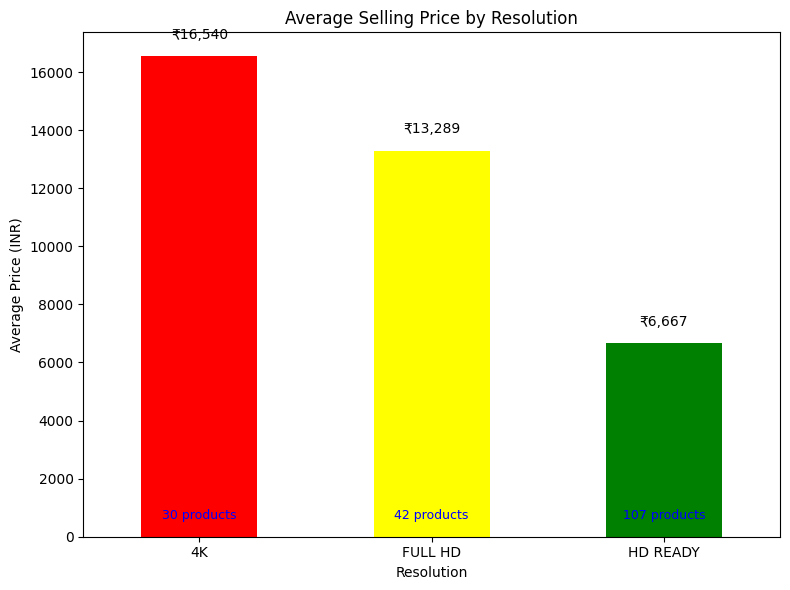

In [125]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

bars = avg_price_per_resolution.plot(kind='bar', color=['red', 'yellow', 'green'], ax=ax)

plt.title('Average Selling Price by Resolution')
plt.ylabel('Average Price (INR)')
plt.xlabel('Resolution')
plt.xticks(rotation=0)

# Loop through bars to add both labels
for idx, (value, count) in enumerate(zip(avg_price_per_resolution, count_per_resolution)):
    # Average Price - above the bar
    ax.text(idx, value + 500, f'₹{int(value):,}', ha='center', va='bottom', fontsize=10, color='black')
    
    # Product Count - below or inside bottom of the bar
    ax.text(idx, 500, f'{count} products', ha='center', va='bottom', fontsize=9, color='blue')

plt.tight_layout()
plt.show()


